# Batch file fitting

In most cases, you are interested in fitting multiple lines within an spectrum. This can be done easily with the $\tt{lime.Spectrum.fit.frame}$ function.

First, we are going to load the data:

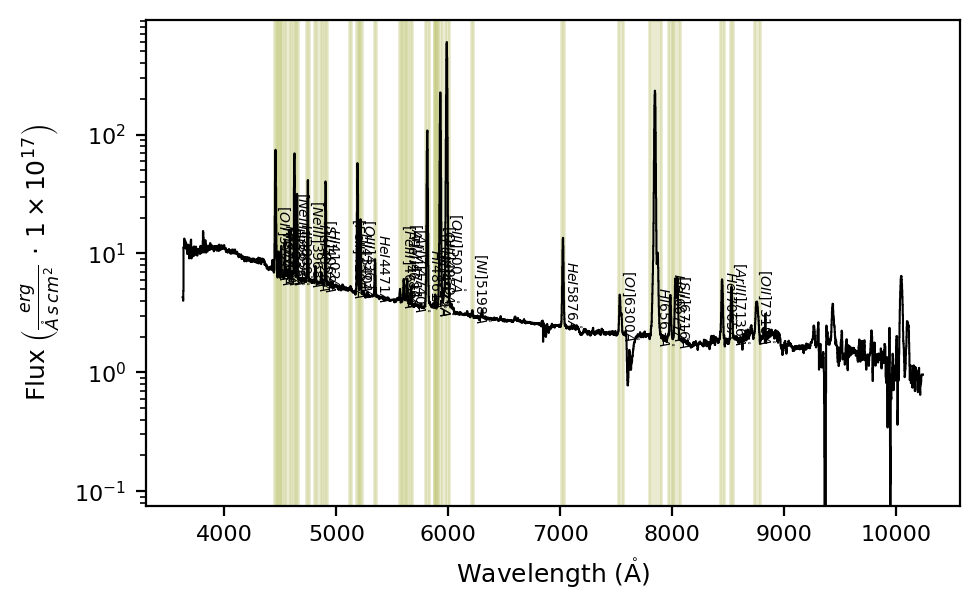

In [1]:
import lime
from pathlib import Path

# State the data files
sample_folder = Path('../0_resources')
obsFitsFile = sample_folder/'spectra/gp121903_osiris.fits'
lineBandsFile = sample_folder/'bands/gp121903_osiris_bands.txt'
cfgFile = sample_folder/'long_slit.toml'

# Create the spectrum object
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=0.19531, norm_flux=1e-17)

# Plot the spectrum alongside the object bands
gp_spec.plot.spectrum(bands=lineBandsFile, log_scale=True)

## Configuration parameter levels

Now, we run this command:


Line fitting progress:
[==========] 100% of 27 lines (O2_7319A_m)

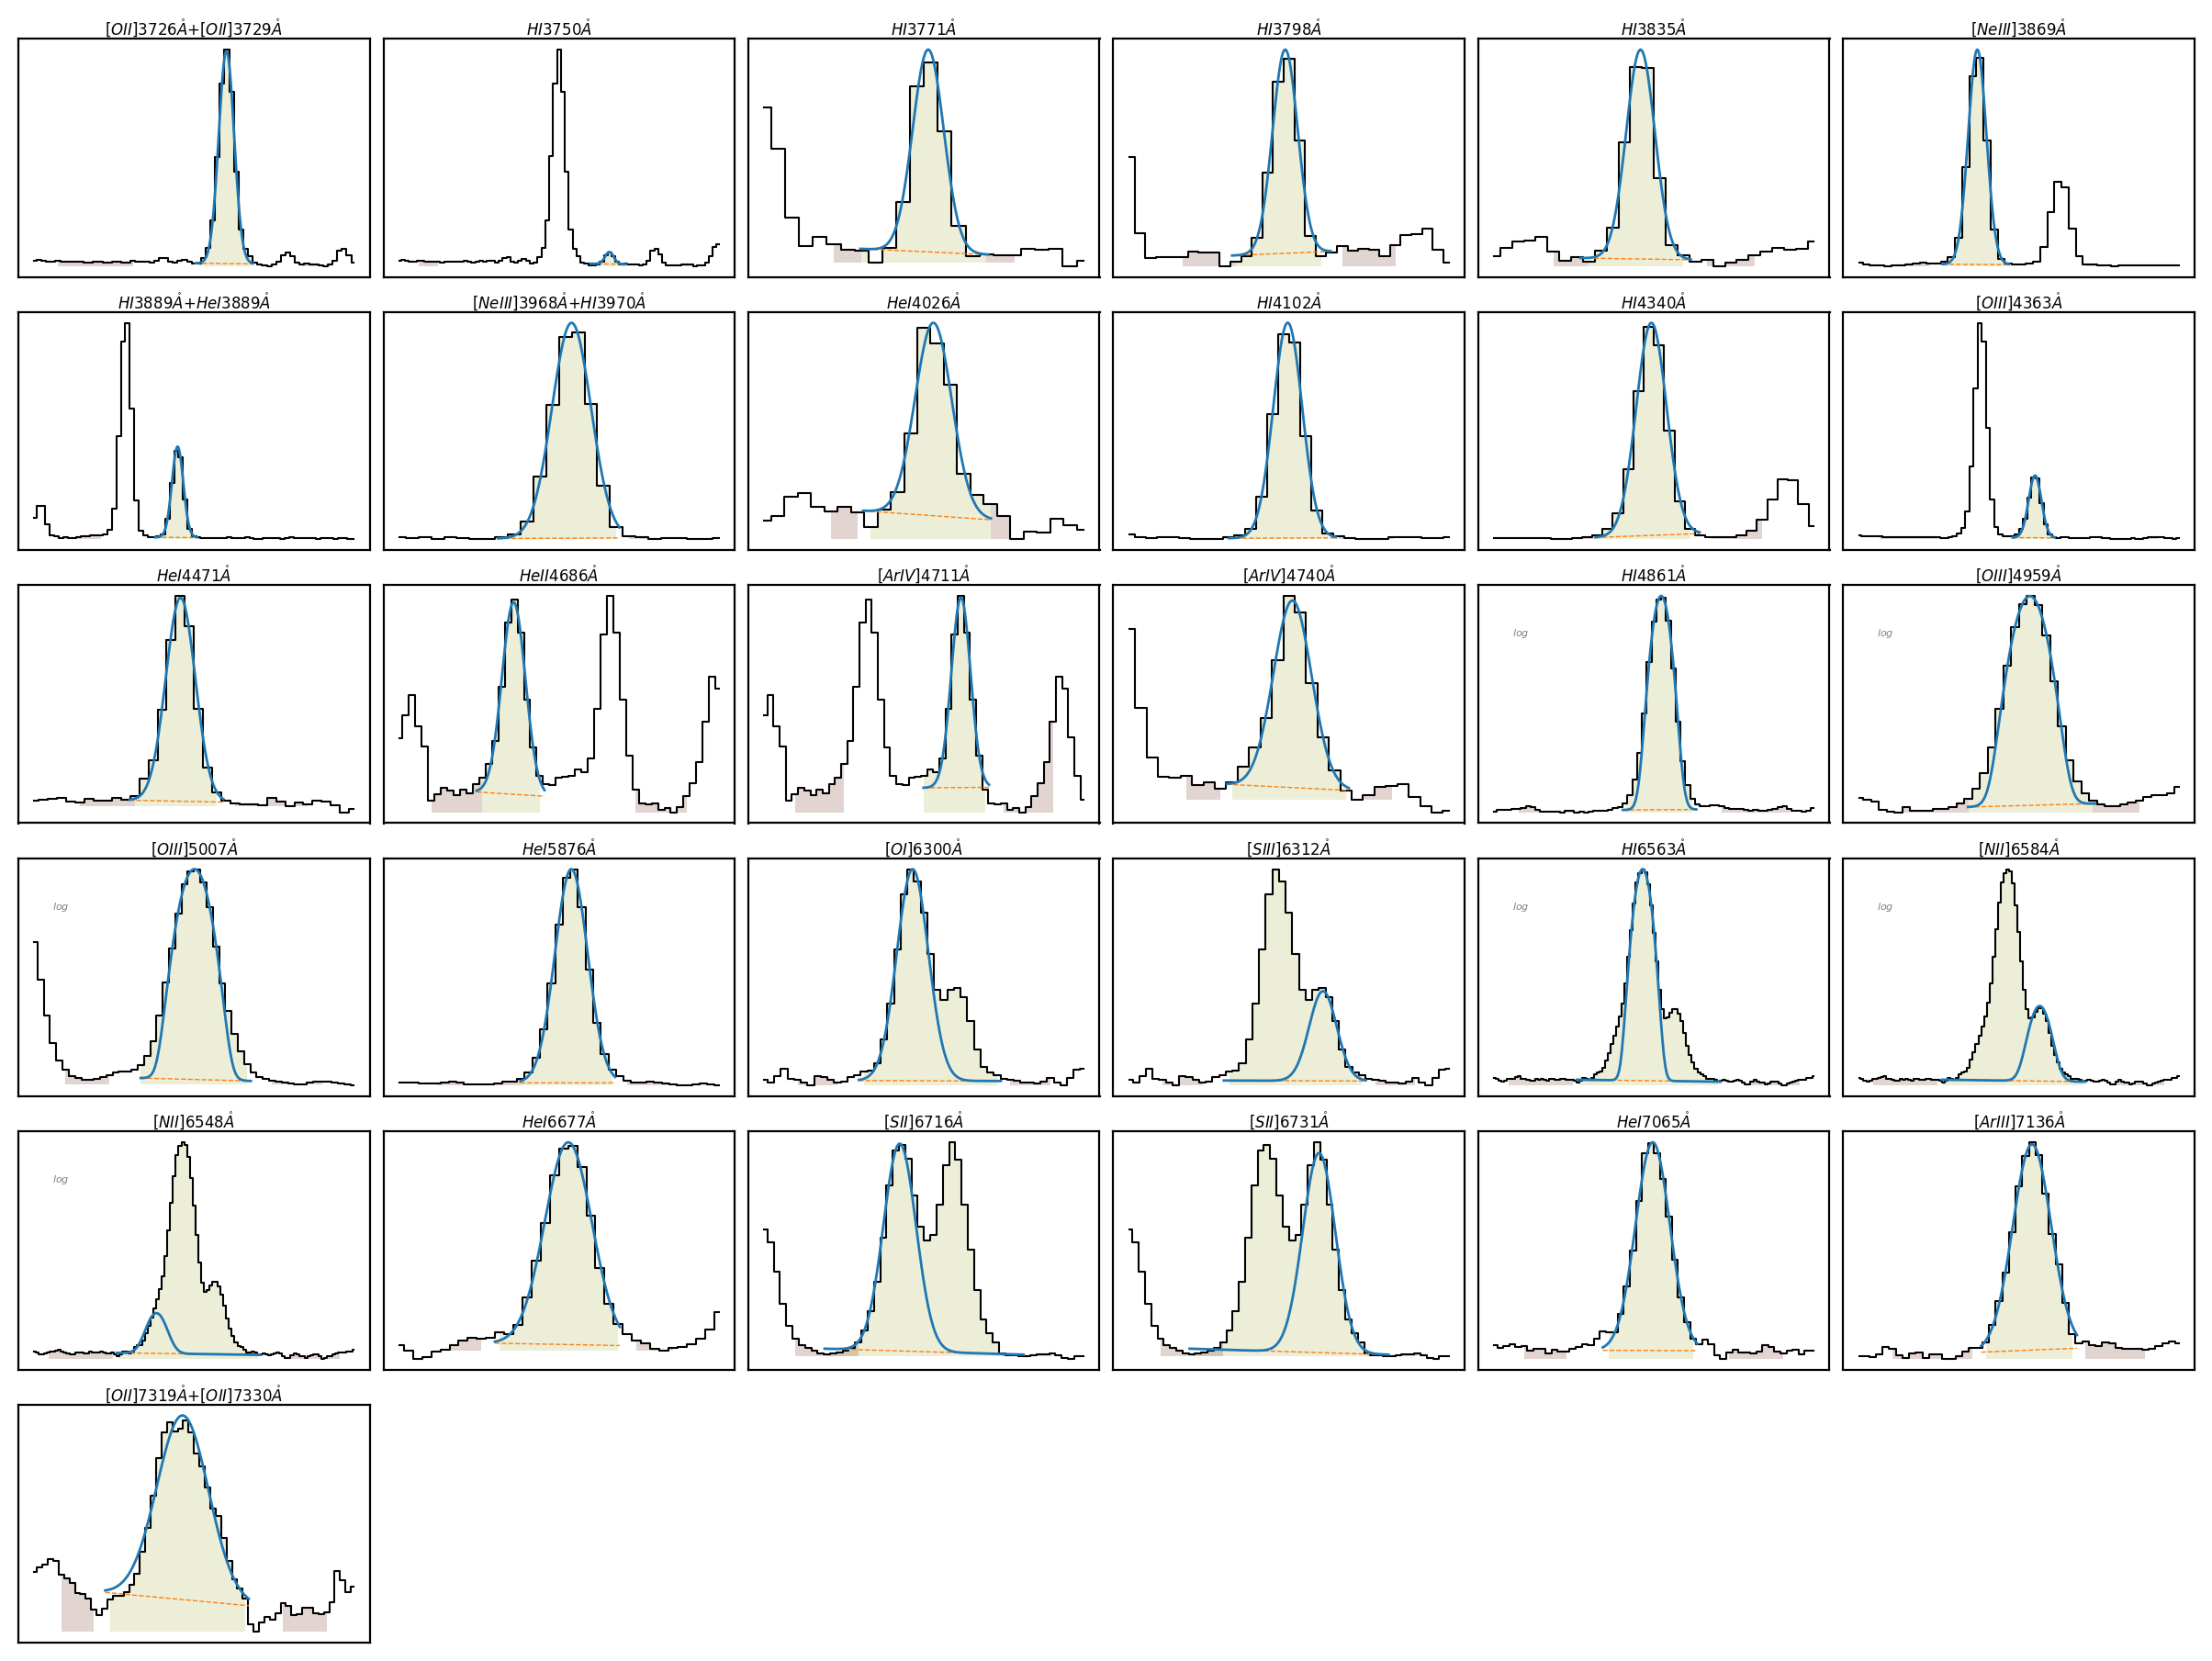

In [2]:
# Line fitting
gp_spec.fit.frame(lineBandsFile, cfgFile, default_conf_prefix='default', id_conf_prefix='gp121903_osiris', line_detection=True)

# Plot fit profiles as a grid
gp_spec.plot.grid()

The following arguments let us introduce the lines we want to measure and the configuration for their fittings:

### a) Bands table 

The ``bands=lineBandsFile`` contains the line labels and bands. It can be a file address or a pandas dataframe. In the latter case it is loaded using this function:

In [3]:
bands_df = lime.load_frame(lineBandsFile)
bands_df[20:]

,w1,w2,w3,w4,w5,w6
He1_4922A,4905.922627,4912.472756,4912.827226,4931.838774,4932.175718,4938.760898
Fe3_4925A,4908.162136,4914.715255,4913.627343,4930.380601,4934.427211,4941.015398
O3_4959A,4929.281844,4946.732665,4946.084002,4974.366850,4972.820372,4984.416360
O3_5007A,4971.796688,4984.514249,4992.853662,5023.301013,5027.743260,5043.797081
N1_5198A_m,5180.493185,5187.409906,5187.948388,5207.695612,5208.215587,5215.169321
He1_5876A,5845.715833,5865.712378,5864.757537,5886.312863,5888.378245,5901.854752
O1_6300A_b,6270.921363,6282.896208,6287.386776,6324.309216,6326.667186,6338.205448
H1_6563A_b,6480.030000,6520.660000,6523.201011,6611.825410,6627.700000,6661.820000
He1_6677A,6654.615528,6663.500418,6665.028235,6688.722365,6690.226409,6699.158845
S2_6716A_b,6686.785257,6706.310255,6696.435165,6751.413558,6744.438091,6759.956250


As you can see this table includes the bands which are blended or merged

### b) Configuration file

The ``fit_conf=cfgFile`` is the file, which contains the configuration for the line profile fittings. It can be a file address or a dictionary. In the latter case it is loaded using this function:

In [4]:
cfg = lime.load_cfg(cfgFile)

import pprint
pprint.pprint(cfg)

{'Izw18_isis_line_fitting': {'H1_6563A_b': 'H1_6563A+H1_6563A_k-1+N2_6584A+N2_6548A',
                             'H1_6563A_k-1_sigma': {'expr': '>1.1*H1_6563A_sigma'},
                             'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
                             'N2_6548A_kinem': 'H1_6563A',
                             'N2_6584A_kinem': 'H1_6563A',
                             'O3_5007A_b': 'O3_5007A+He1_5016A'},
 'SHOC579_sdss_line_fitting': {'H1_3712A_kinem': 'H1_3734A',
                               'H1_4861A_b': 'H1_4861A+H1_4861A_k-1',
                               'H1_4861A_k-1_sigma': {'expr': '>1.0*H1_4861A_sigma'},
                               'H1_6563A_b': 'H1_6563A+H1_6563A_k-1+N2_6584A+N2_6548A',
                               'H1_6563A_k-1_center': {'max': 6563.0,
                                                       'min': 6561.0,
                                                       'value': 6562.0},
                               'H1_6563A_k-1_sigma':

### c) Configuration level prefixes:

The $\tt{lime.Spectrum.fit.frame}$ function can accept two configuration levels for your fitting from the configuration files. At lowest levelm, we have ``default_conf_prefix='default'`` as the generic entry:

In [5]:
default_conf_prefix='default'
pprint.pprint(cfg[f'{default_conf_prefix}_line_fitting'])

{'Ar4_4711A_m': 'Ar4_4711A+He1_4713A',
 'H1_3889A_m': 'H1_3889A+He1_3889A',
 'H1_3970A_m': 'Ne3_3968A+H1_3970A',
 'N1_5198A_m': 'N1_5198A+N1_5200A',
 'Ne3_3968A_b': 'Ne3_3968A+H1_3970A',
 'Ne3_3968A_m': 'Ne3_3968A+H1_3970A',
 'O2_3726A_b': 'O2_3726A+O2_3729A',
 'O2_3726A_m': 'O2_3726A+O2_3729A',
 'O2_7319A_b': 'O2_7319A+O2_7330A',
 'O2_7319A_m': 'O2_7319A+O2_7330A',
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'continuum': {'degree_list': [3, 6, 6], 'emis_threshold': [3, 2, 1.5]},
 'peaks_troughs': {'sigma_threshold': 3}}


In addition, the command above also has the ``id_conf_prefix='gp121903_line_fitting'`` which applies the configuration for this object:

In [6]:
id_conf_prefix='gp121903_osiris'
pprint.pprint(cfg[f'{id_conf_prefix}_line_fitting'])

{'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
 'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
 'N2_6548A_kinem': 'N2_6584A',
 'O1_6300A_b': 'O1_6300A+S3_6312A',
 'O3_5007A_b': 'O3_5007A+O3_5007A_k-1',
 'O3_5007A_k-1_amp': {'expr': '<100.0*O3_5007A_amp', 'min': 0.0},
 'O3_5007A_k-1_sigma': {'expr': '>2.0*O3_5007A_sigma'},
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'S2_6731A_kinem': 'S2_6716A'}


This works by **updating** the default configuration with the current object parameters. This is equivalent to:

In [7]:
default_conf_prefix = 'default'
cfg[f'{default_conf_prefix}_line_fitting'].update(cfg[f'{id_conf_prefix}_line_fitting'])
pprint.pprint(cfg[f'{default_conf_prefix}_line_fitting'])

{'Ar4_4711A_m': 'Ar4_4711A+He1_4713A',
 'H1_3889A_m': 'H1_3889A+He1_3889A',
 'H1_3970A_m': 'Ne3_3968A+H1_3970A',
 'H1_6563A_b': 'H1_6563A+N2_6584A+N2_6548A',
 'N1_5198A_m': 'N1_5198A+N1_5200A',
 'N2_6548A_amp': {'expr': 'N2_6584A_amp/2.94'},
 'N2_6548A_kinem': 'N2_6584A',
 'Ne3_3968A_b': 'Ne3_3968A+H1_3970A',
 'Ne3_3968A_m': 'Ne3_3968A+H1_3970A',
 'O1_6300A_b': 'O1_6300A+S3_6312A',
 'O2_3726A_b': 'O2_3726A+O2_3729A',
 'O2_3726A_m': 'O2_3726A+O2_3729A',
 'O2_7319A_b': 'O2_7319A+O2_7330A',
 'O2_7319A_m': 'O2_7319A+O2_7330A',
 'O3_5007A_b': 'O3_5007A+O3_5007A_k-1',
 'O3_5007A_k-1_amp': {'expr': '<100.0*O3_5007A_amp', 'min': 0.0},
 'O3_5007A_k-1_sigma': {'expr': '>2.0*O3_5007A_sigma'},
 'S2_6716A_b': 'S2_6716A+S2_6731A',
 'S2_6731A_kinem': 'S2_6716A',
 'continuum': {'degree_list': [3, 6, 6], 'emis_threshold': [3, 2, 1.5]},
 'peaks_troughs': {'sigma_threshold': 3}}


This is why we recognize ``O2_3726A_m`` as a merged line on the default configuration:

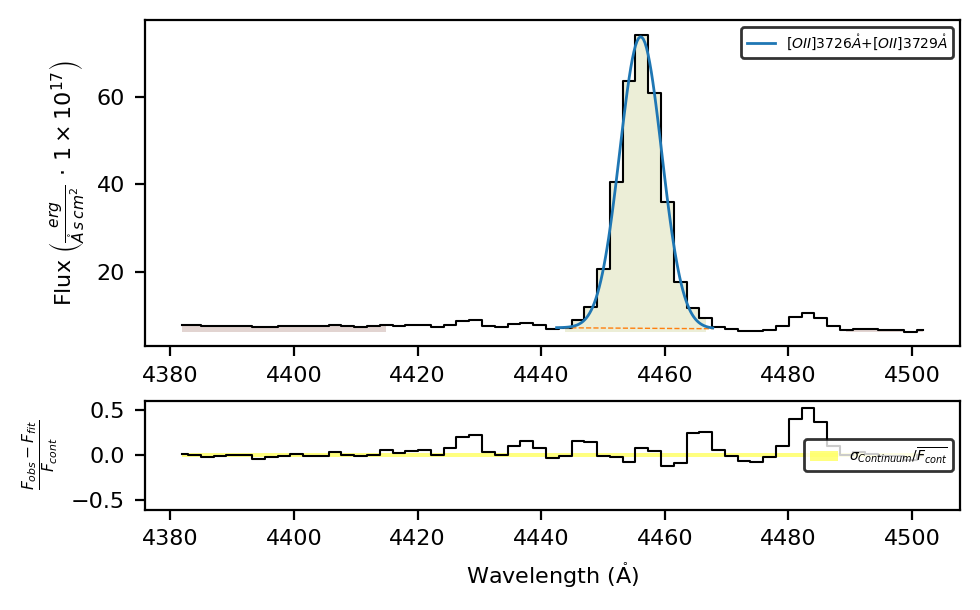

In [8]:
gp_spec.plot.bands('O2_3726A_m')

And fit deblend the components from the $H\alpha$:

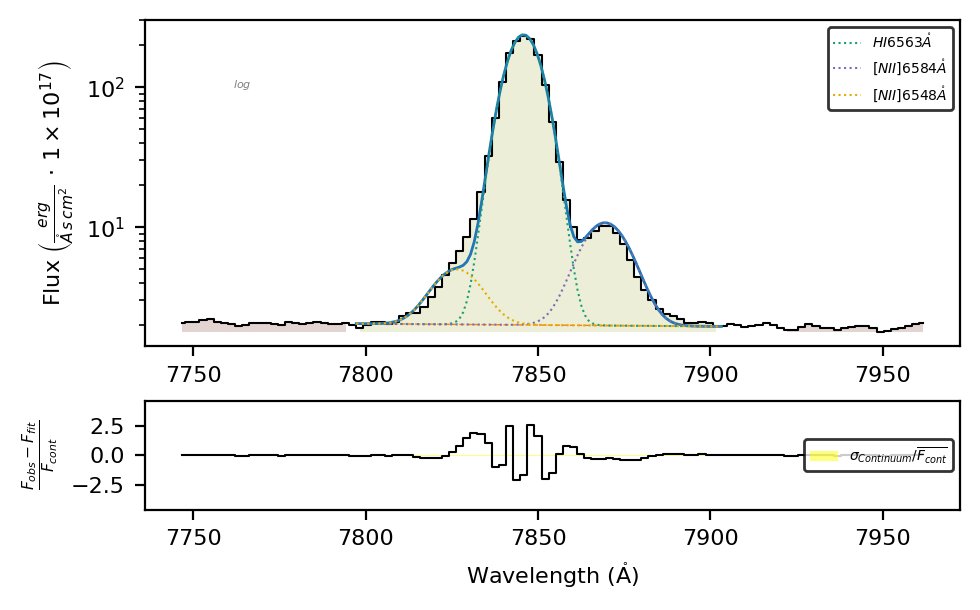

In [9]:
gp_spec.plot.bands('H1_6563A')

<div class="alert alert-info">

**Please remember:** In an update, the common entries in the object fitting configuration **overwrite** those from in the default fitting configuration.

</div>

### d) Line detection

The final argument ``line_detection=True`` runs the [continuum fitting](https://lime-stable.readthedocs.io/en/latest/guides/1_continuum_fitting.html) and [peaks/troughs detection](https://lime-stable.readthedocs.io/en/latest/guides/1_continuum_fitting.html) before the line fitting. This requires to include these function arguments on the configuration file:

In [10]:
print(cfg['default_line_fitting']['continuum'])
print(cfg['default_line_fitting']['peaks_troughs'])

{'degree_list': [3, 6, 6], 'emis_threshold': [3, 2, 1.5]}
{'sigma_threshold': 3}


As for the profile fitting configuration, the user can include these entries on the ``default`` and ``id`` levels to adjust the configuration to different objects. 

## Multiple observations

The previous levels make it easier to treat multiple spectra while minimizing the user inputs. As you might have noticed the configuration file above has several sections from several objects with different and instruments. We have a table with the bands for every object and we are going to fit them iterative with the same command:

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1.000000045813705e-18.



Line fitting progress:
[==========] 100% of 33 lines (O2_7319A_m)

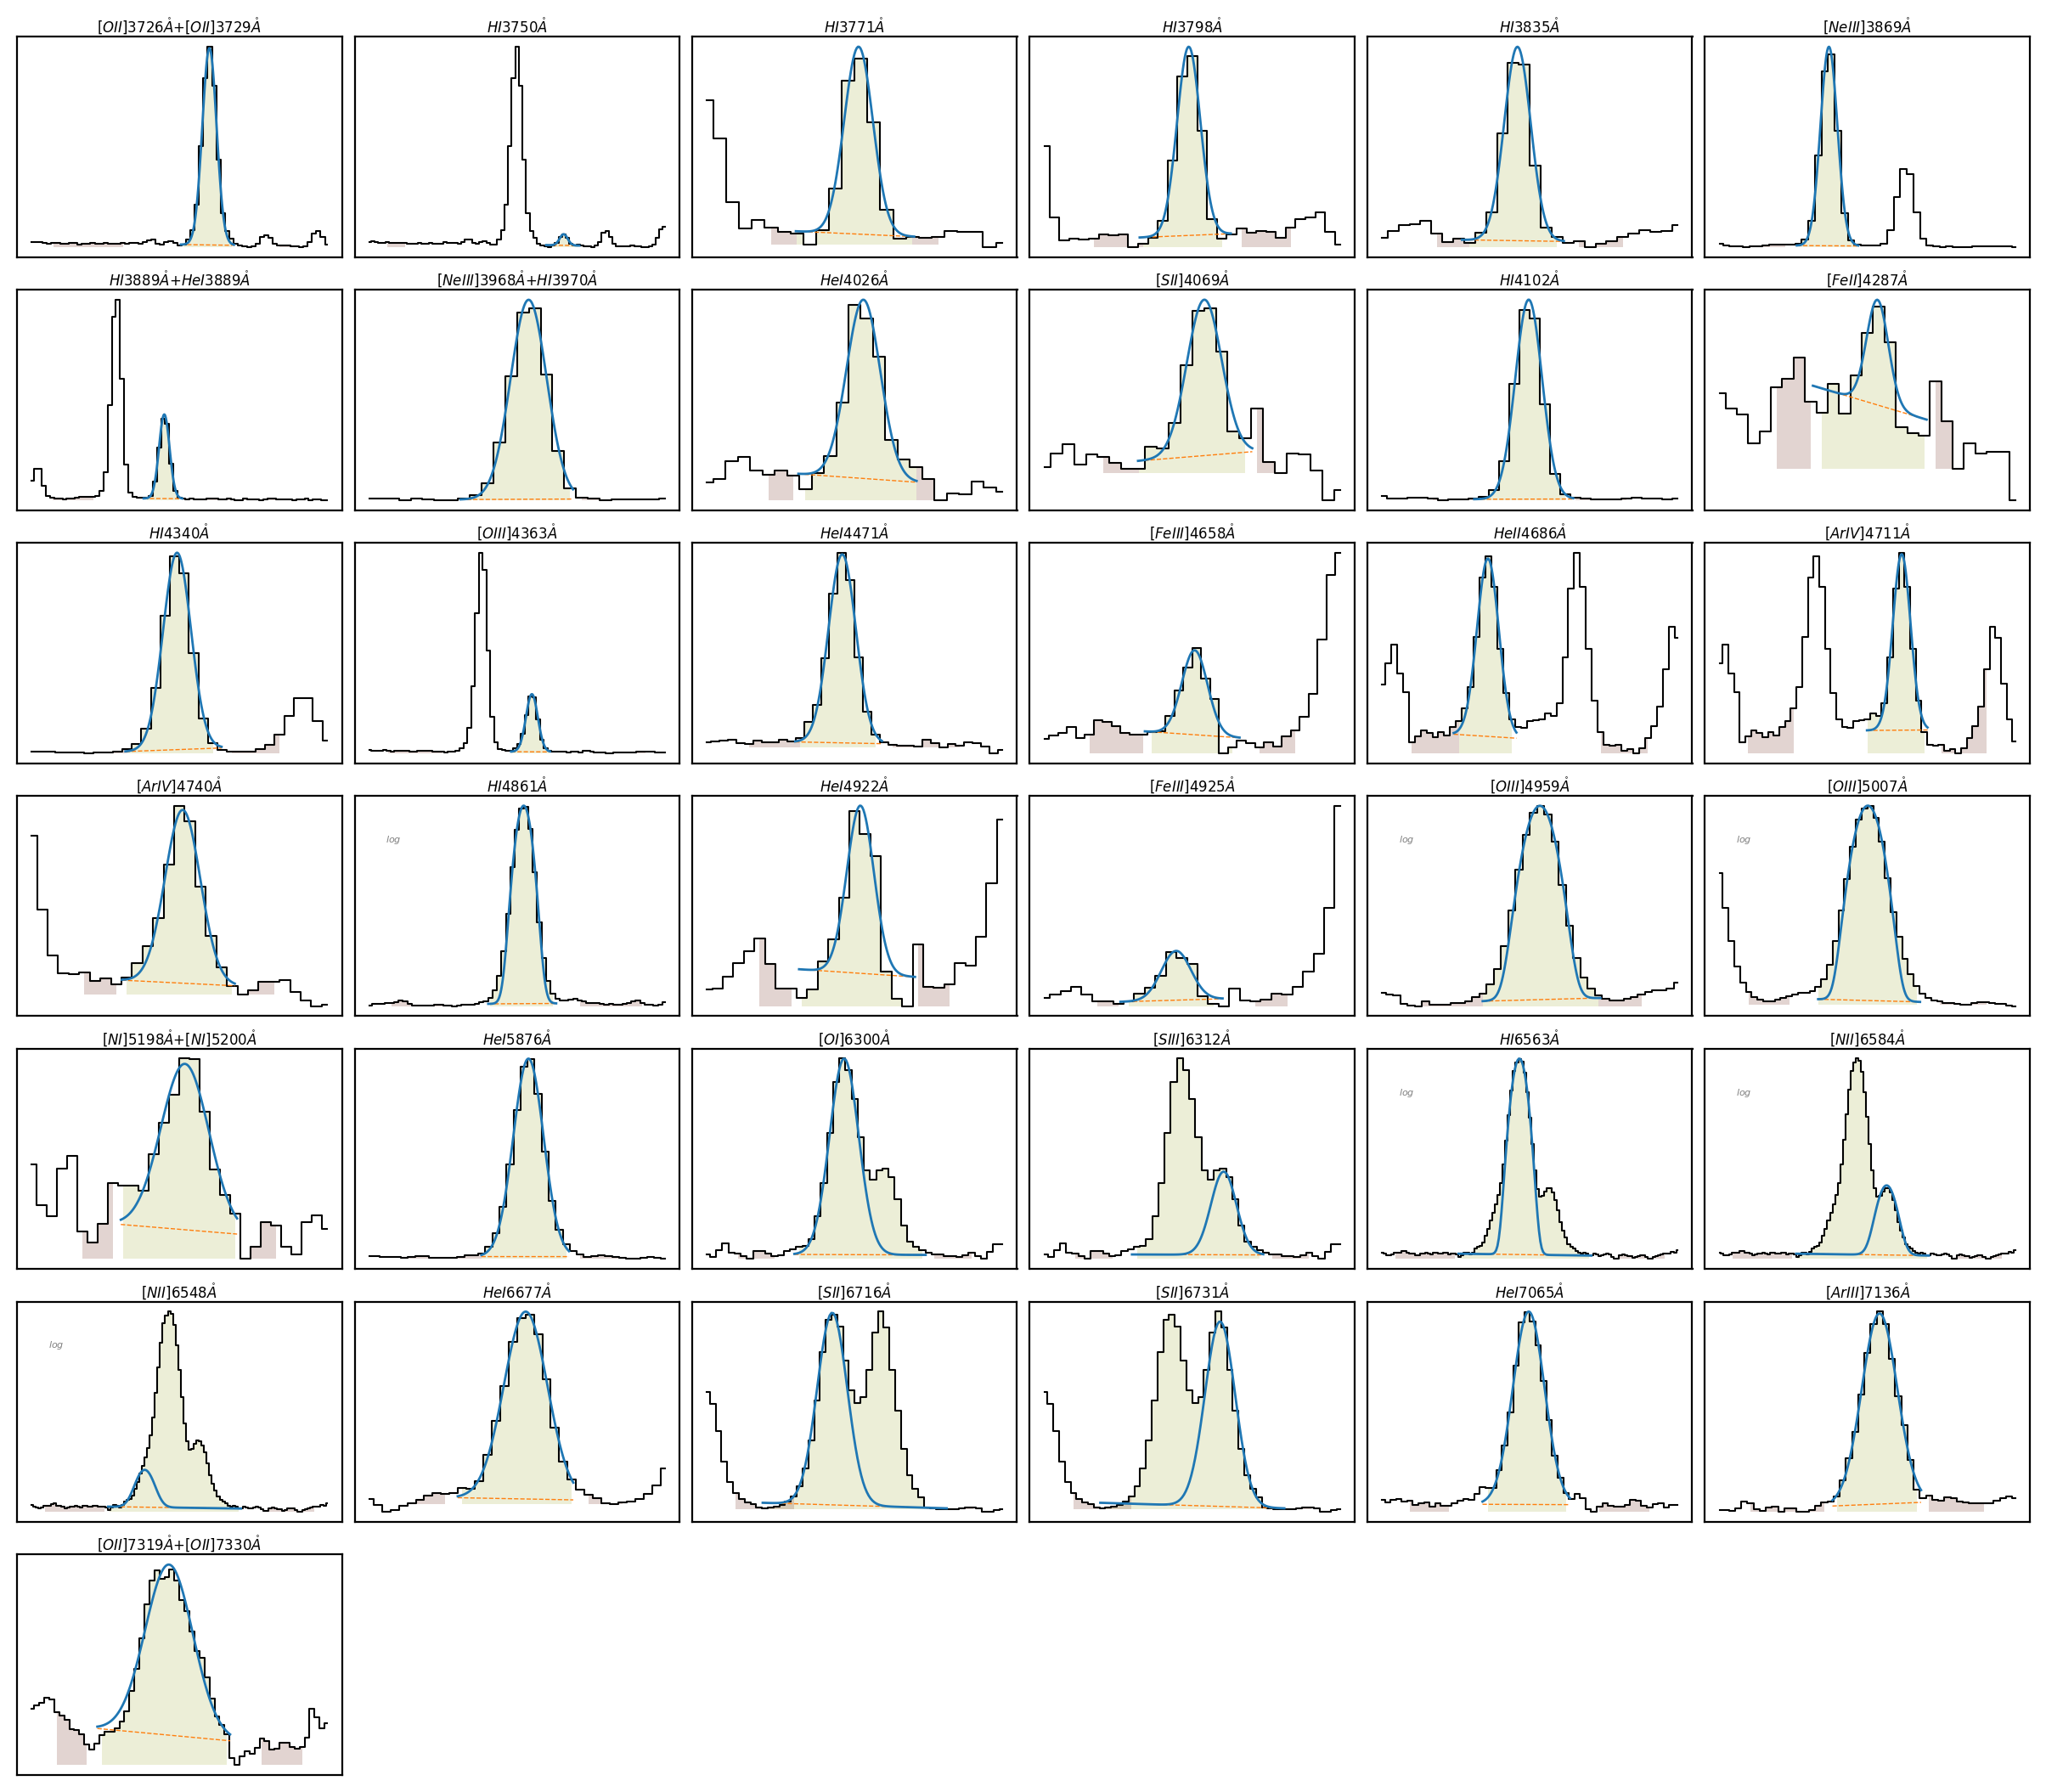

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1e-08.
LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 1e-15.



Line fitting progress:
[==========] 100% of 10 lines (O3_5007A)m)

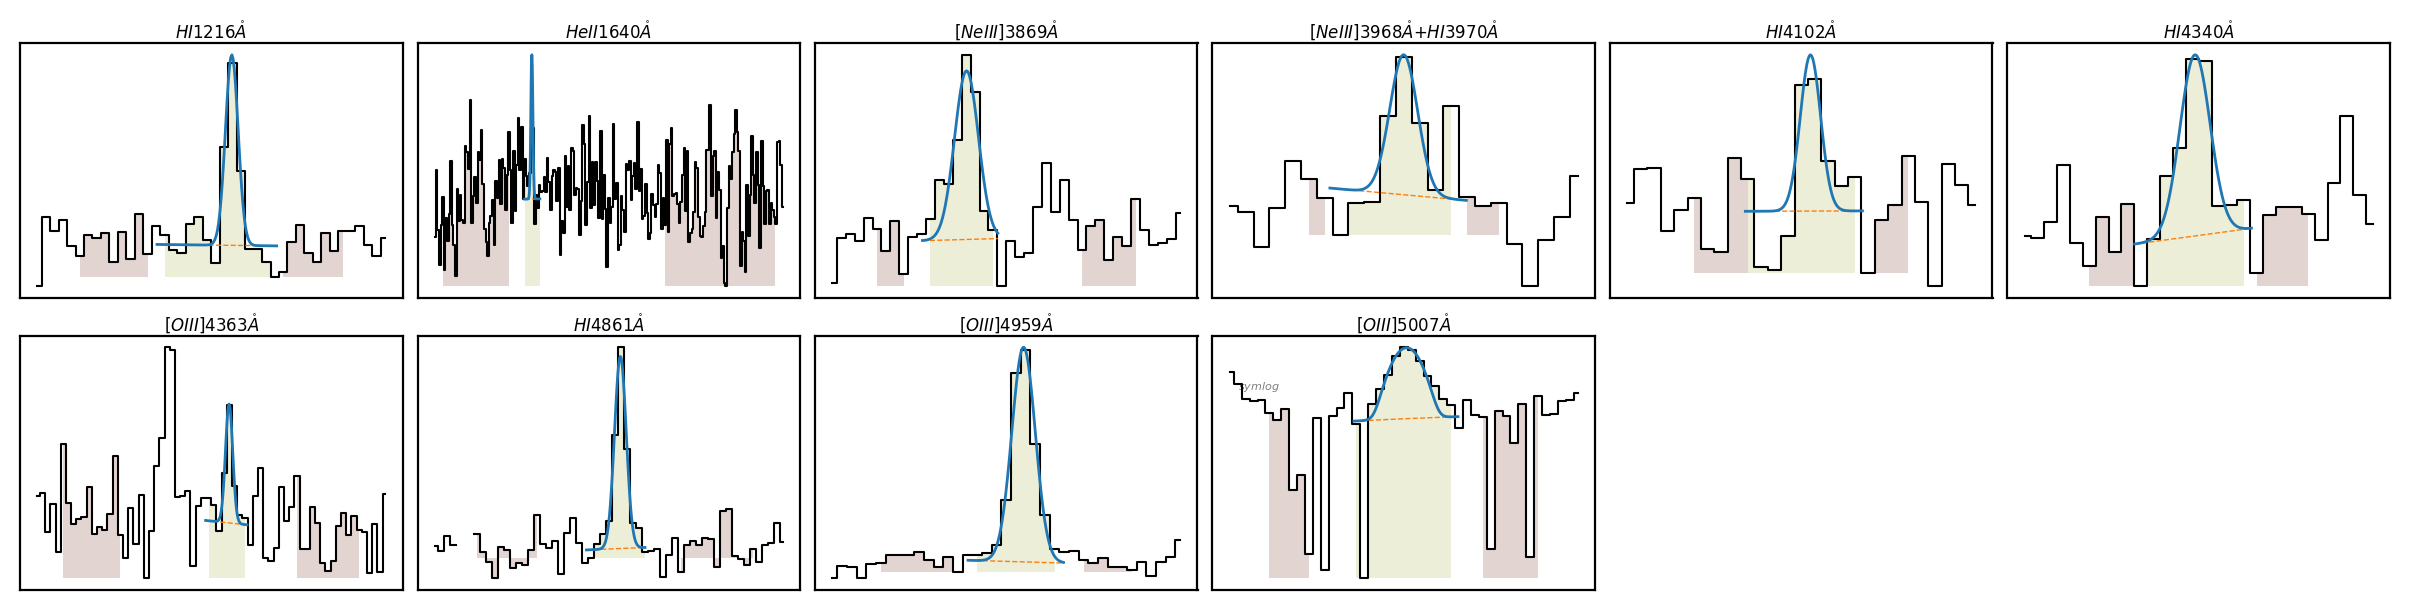

LiMe INFO: The observation does not include a normalization but the mean flux value is below 0.001. The flux will be automatically normalized by 9.99999983775159e-18.



Line fitting progress:
[==========] 100% of 14 lines (Ar3_7136A)

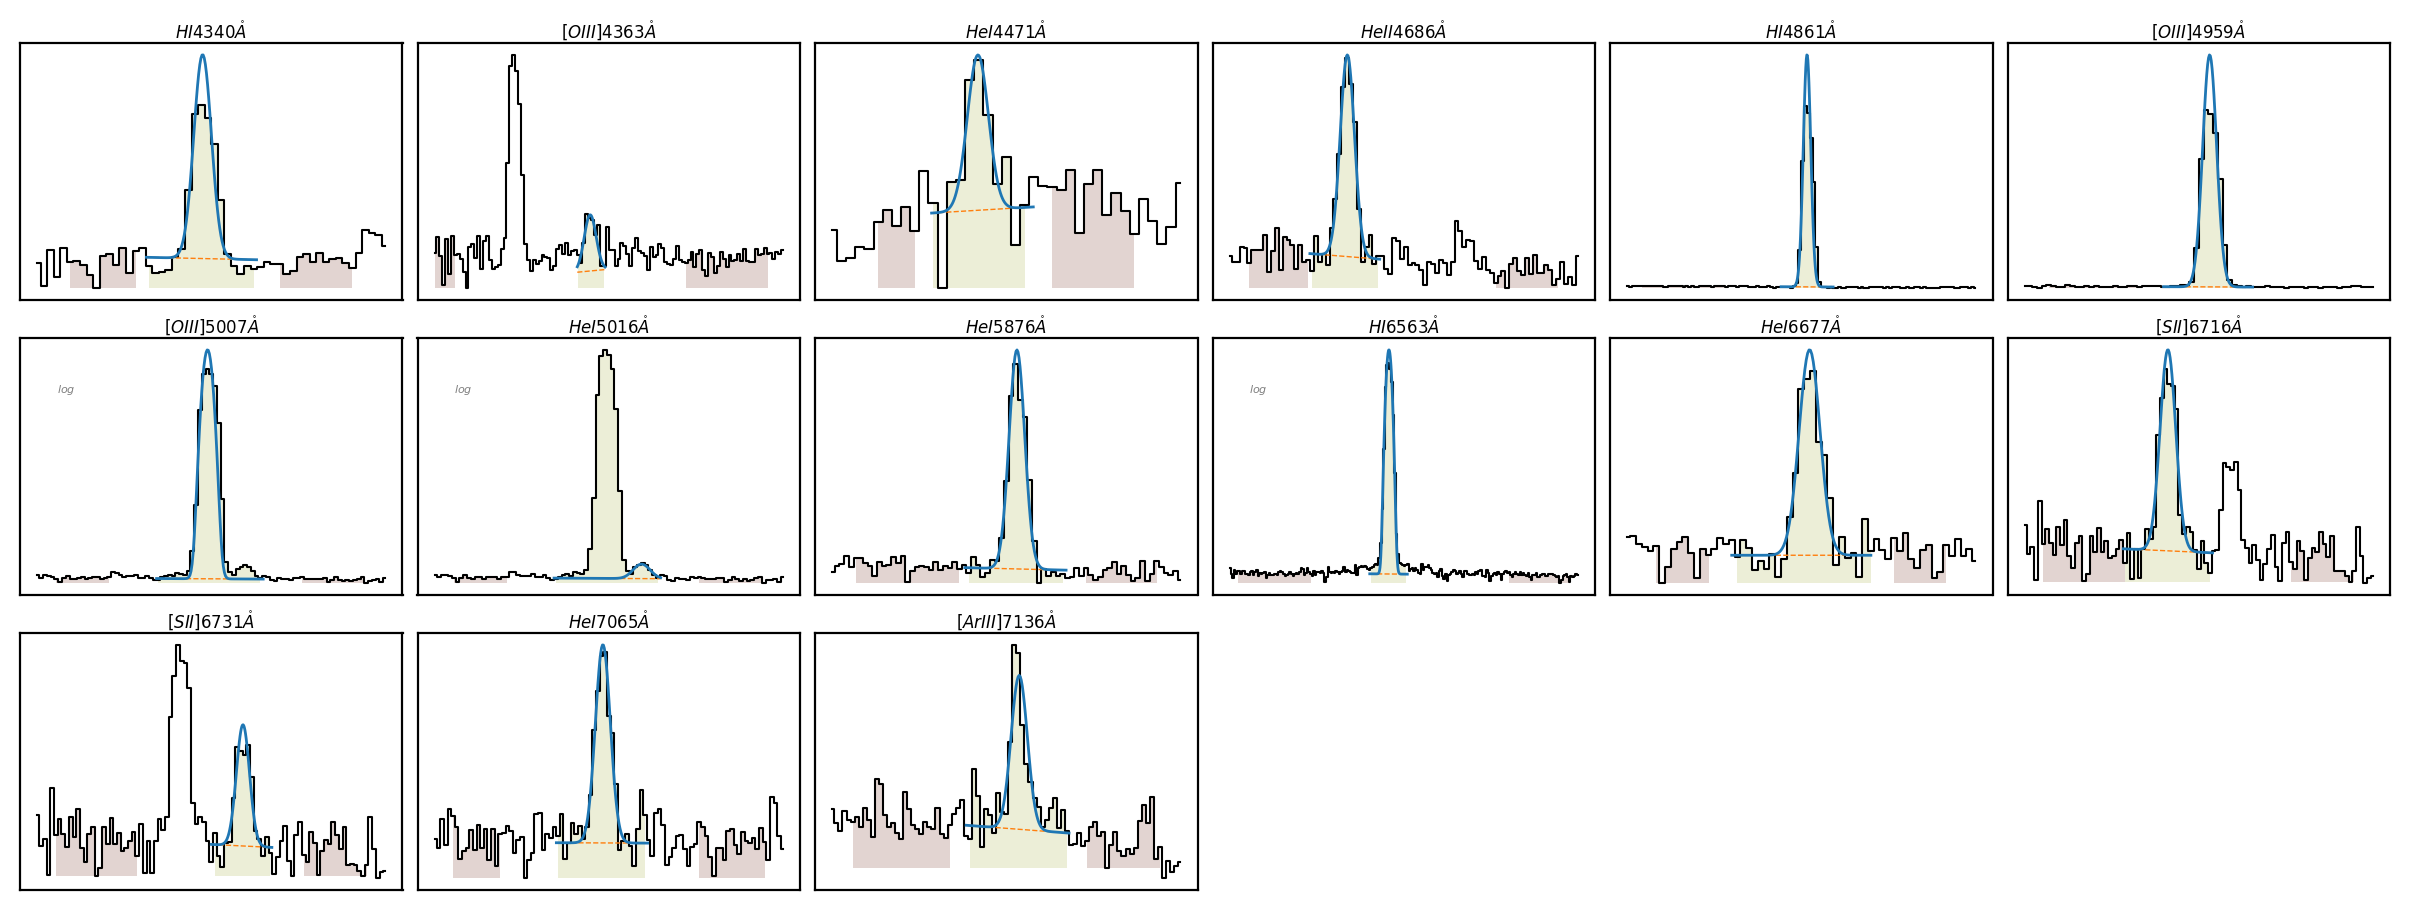


Line fitting progress:
[==========] 100% of 42 lines (H1_8750A)))

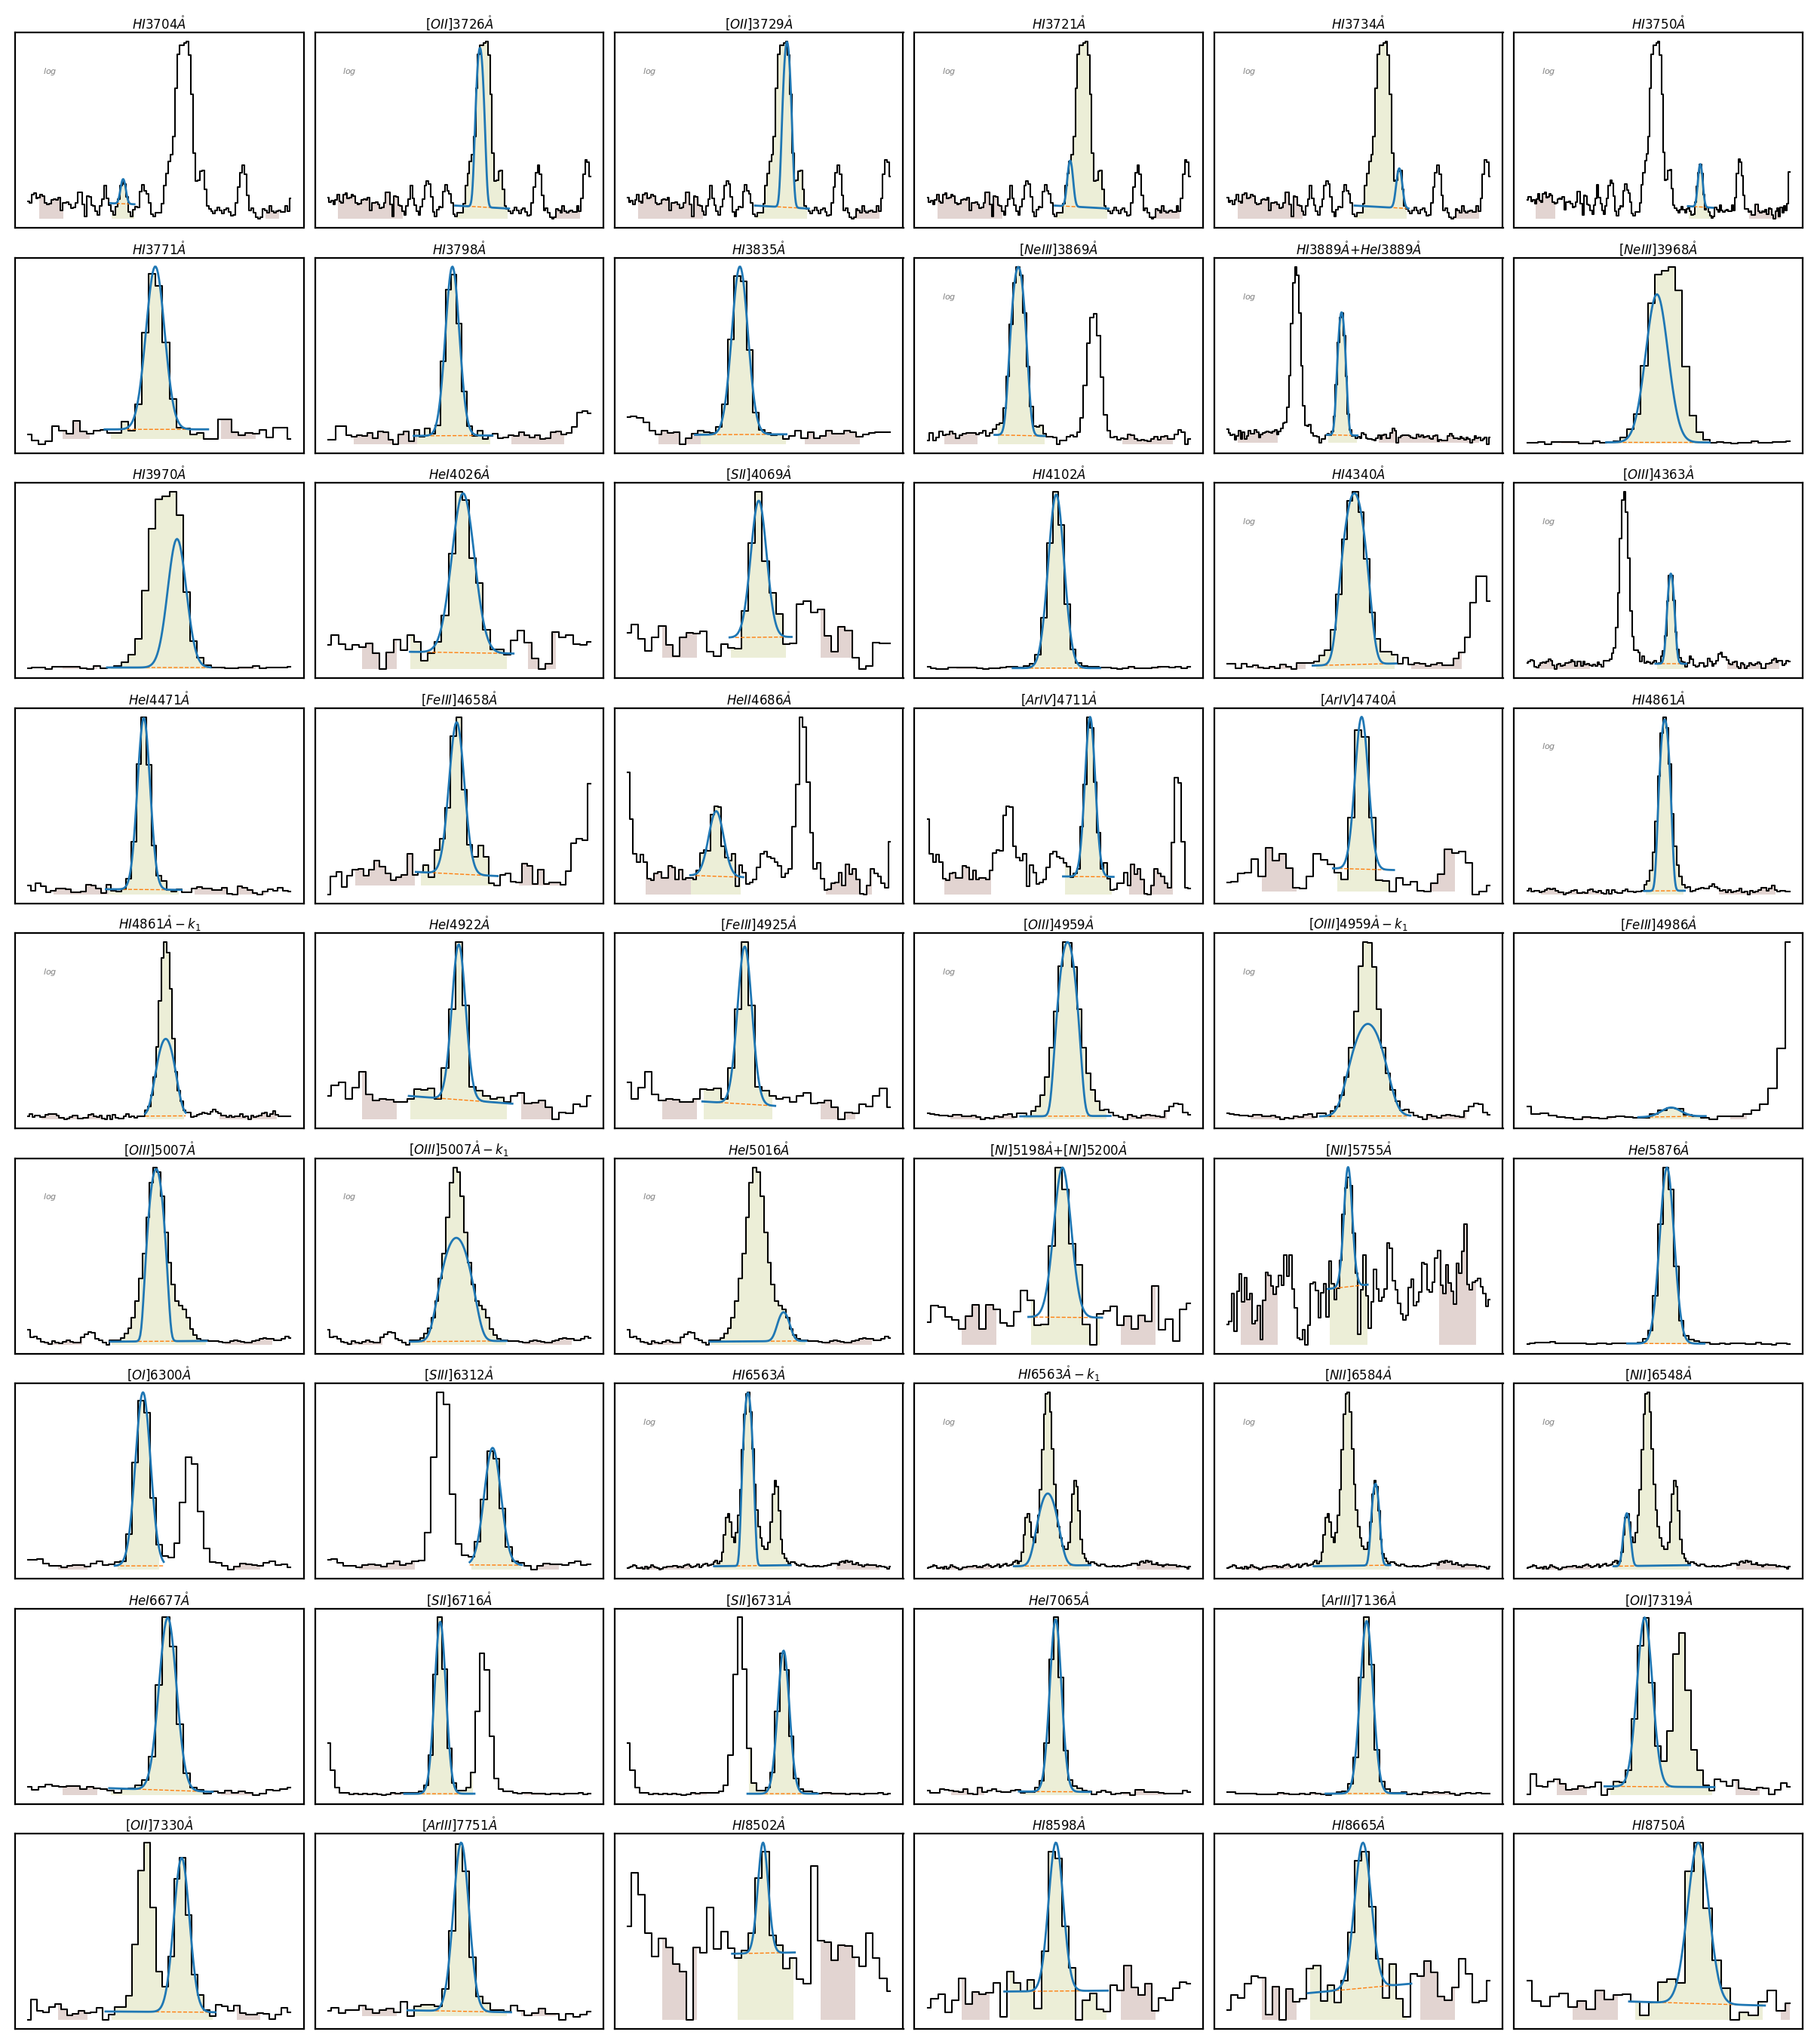

In [13]:
# Instrument - object dictionary
object_dict = {'osiris':'gp121903', 'nirspec':'ceers1027', 'isis':'Izw18', 'sdss':'SHOC579'}

# Instrument - file dictionary
files_dict = {'osiris': 'gp121903_osiris.fits', 'isis': 'IZW18_isis.fits',
              'nirspec':'hlsp_ceers_jwst_nirspec_nirspec10-001027_comb-mgrat_v0.7_x1d-masked.fits', 'sdss':'SHOC579_SDSS_dr18.fits'}

# Loop through the files
for i, items in enumerate(object_dict.items()):

    inst, obj = items
    file_path = sample_folder/'spectra'/files_dict[inst]
    redshift = cfg[inst][obj]['z']

    # Create the observation object
    spec = lime.Spectrum.from_file(file_path, inst, redshift=redshift)

    # Unit conversion for NIRSPEC object
    if spec.units_wave != 'AA':
        spec.unit_conversion('AA', 'FLAM')

    # Revised bands for every object
    bands_file = sample_folder/'bands'/f'{obj}_{inst}_bands.txt'

    # Fit the lines and plot the measurements
    spec.fit.frame(bands_file, cfgFile, id_conf_prefix=f'{obj}_{inst}')
    spec.plot.grid()


## Takeaways
* In order to measure multiple lines, it is recomended that the user employs the $\tt{lime.Spectrum.fit.frame}$ function and keep the target lines and their profile configuration in external files.
* It is recommended that the user keeps his/her own line bands table for each instrument. These tables can then be adjusted by the $\tt{lime.Spectrum.retrieve.line\_bands}$.
* In a configuration file, the user can provide upto two configuration levels. This is useful to provide a ``default`` configuration for every object and an ``object`` for those observations which required specific settings.